In [2]:
#Pandas - data structures to store table and time series data
import pandas as pd

In [3]:
#Numpy - numerical computing of array and matrix, generate random numbers
import numpy as np

In [48]:
#Matplotlib - plotting package
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Statsmodel for time series analysis

In [6]:
#Import .csv file using pandas
stb = pd.read_csv(r'A:\0. INVESTMENT\Data\excel_stb.csv')

In [7]:
stb.head()

,YYYYMMDD,OpenFixed,HighFixed,LowFixed,CloseFixed,Volume
0,20060712,12.4204,12.4204,12.4204,12.4204,763190
1,20060713,12.7389,12.9777,12.7389,12.9777,1694670
2,20060714,13.2166,13.2166,12.8185,12.8185,935410
3,20060717,12.5796,12.5796,12.3408,12.3408,1320510
4,20060718,12.0223,12.0223,12.0223,12.0223,721380


In [8]:
type(stb)

pandas.core.frame.DataFrame

In [9]:
stb.index

RangeIndex(start=0, stop=3849, step=1)

There are 2 methods to slide the data:
1. Selection by **label**: .loc
2. Selection by **position**: .iloc

In [10]:
stb.iloc[0,0:5]

YYYYMMDD      2.006071e+07
OpenFixed     1.242040e+01
HighFixed     1.242040e+01
LowFixed      1.242040e+01
CloseFixed    1.242040e+01
Name: 0, dtype: float64

In [11]:
stb.index[2]

2

In [12]:
stb.shape

(3849, 6)

In [13]:
stb.describe()

,YYYYMMDD,OpenFixed,HighFixed,LowFixed,CloseFixed,Volume
count,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03
mean,2.013795e+07,13.559464,13.731081,13.397392,13.560109,4.667733e+06
std,4.462366e+04,4.867624,4.931665,4.795328,4.859115,8.539124e+06
min,2.006071e+07,5.143400,5.182100,5.027300,5.027300,0.000000e+00
25%,2.010052e+07,10.400000,10.550000,10.300000,10.400000,5.703400e+05
50%,2.014040e+07,12.500000,12.645700,12.309300,12.500000,1.556280e+06
75%,2.018020e+07,15.341500,15.506500,15.176500,15.341500,4.205060e+06
max,2.021121e+07,33.500000,33.900000,32.350000,33.800000,9.997850e+07


In [14]:
stb = stb.set_index('YYYYMMDD')

In [15]:
stb.tail()

,OpenFixed,HighFixed,LowFixed,CloseFixed,Volume
YYYYMMDD,,,,,
20211206,28.00,28.40,26.4,27.00,26472000
20211207,27.30,28.10,26.9,28.05,12829200
20211208,28.05,28.80,27.8,28.60,15748100
20211209,28.50,28.90,28.4,28.85,11915400
20211210,28.85,29.05,28.4,28.60,9892400


In [16]:
stb['TomorrowPrice'] = stb['CloseFixed'].shift(-1)

In [18]:
stb['PriceDiff'] = stb['TomorrowPrice'] - stb['CloseFixed'] 

In [19]:
stb['Return'] = stb['PriceDiff']/stb['CloseFixed']

In [21]:
stb['Direction'] = [1 if stb.loc[ei, 'PriceDiff'] > 0 else -1 for ei in stb.index]

There are different types of moving averages which include:
1. Simple - SMA
2. Exponential - EMA
3. Weighted 
4. Smoothed 

These are ways to capture SMA:

stb['SMA3'] = (stb['CloseFixed'] + stb['CloseFixed'].shift(-1) + stb['CloseFixed'].shift(-2))/3

or

stb['SMA3'] = stb['CloseFixed'].rolling(3).mean()

In [34]:
stb['SMA3'] = stb['CloseFixed'].rolling(3).mean()

In [35]:
stb['SMA10'] = stb['CloseFixed'].rolling(50).mean()

In [36]:
stb['SMA50'] = stb['CloseFixed'].rolling(200).mean()

<AxesSubplot:xlabel='YYYYMMDD'>

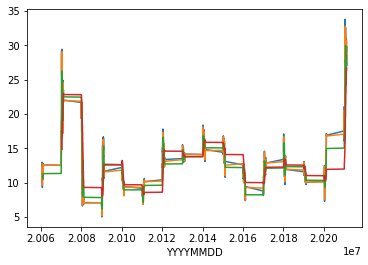

In [37]:
stb['CloseFixed'].plot()
stb['SMA3'].plot()
stb['SMA10'].plot()
stb['SMA50'].plot()

In [40]:
stb['Shares'] = [1 if stb.loc[ei, 'SMA10']>stb.loc[ei, 'SMA50'] else 0 for ei in stb.index]

In [43]:
stb['Profit'] = [stb.loc[ei, 'TomorrowPrice'] - stb.loc[ei, 'CloseFixed'] if stb.loc[ei, 'Shares']== 1 else 0 for ei in stb.index]

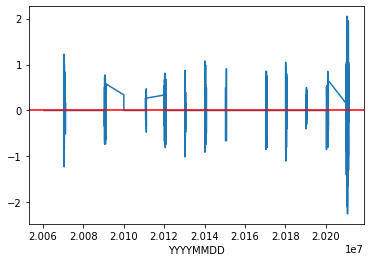

In [50]:
stb['Profit'].plot()
plt.axhline(y = 0, color = 'red')

In [51]:
stb['Wealth'] = stb['Profit'].cumsum()

In [52]:
stb.tail()

,OpenFixed,HighFixed,LowFixed,CloseFixed,Volume,TomorrowPrice,PriceDiff,Return,Direction,SMA3,SMA5,SMA10,SMA50,SMA200,Shares,Profit,Wealth
YYYYMMDD,,,,,,,,,,,,,,,,,
20211206,28.00,28.40,26.4,27.00,26472000,28.05,1.05,0.038889,1,28.100000,28.62,27.261,26.45375,26.45375,1,1.05,8.1175
20211207,27.30,28.10,26.9,28.05,12829200,28.60,0.55,0.019608,1,27.683333,28.45,27.291,26.50000,26.50000,1,0.55,8.6675
20211208,28.05,28.80,27.8,28.60,15748100,28.85,0.25,0.008741,1,27.883333,28.19,27.347,26.55125,26.55125,1,0.25,8.9175
20211209,28.50,28.90,28.4,28.85,11915400,28.60,-0.25,-0.008666,-1,28.500000,28.10,27.410,26.60300,26.60300,1,-0.25,8.6675
20211210,28.85,29.05,28.4,28.60,9892400,NaN,NaN,NaN,-1,28.683333,28.22,27.488,26.65425,26.65425,1,NaN,NaN


In [55]:
print('Total money you win is', stb.loc[stb.index[-2], 'Wealth'])

Total money you win is 8.667499999999999


In [58]:
print('Total money you spent is', stb.loc[stb.index[0], 'CloseFixed'])

Total money you spent is 12.4204


<AxesSubplot:xlabel='YYYYMMDD'>

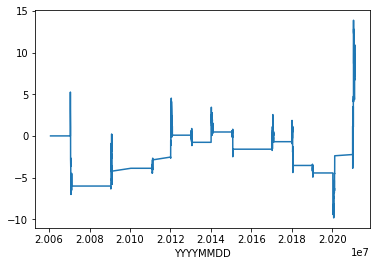

In [59]:
stb['Wealth'].plot()